### INICIANDO O PROCESSO DE EXTRAÇÃO E TRANSFORMAÇÃO DA BASE DE DADOS

In [4]:
import pandas as pd
import re

caminho_arquivo = './data/canada.xlsm'

# Leitura do arquivo Excel, ignorando as colunas extras
df = pd.read_excel(caminho_arquivo, engine='openpyxl', header=None)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,"name,description,employees,total_funding,city,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"fitin,""fitin is the latest fit tech platform t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"quinditech,""our services include independent &...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"botfirst,""chatlanding is a digital chatbot pla...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"bravver,ai-powered army of health professional...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21293,"eestor corporation,eestor corporation's (the â...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21294,"colliers international,""colliers international...",tsx: cig) is the leader in global real estate...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21295,"h2o innovation,""h2o innovation is known for it...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21296,"ovivo,""ovivo is a world leader in equipment an...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ORGANIZAÇÃO DA BASE DE DADOS, SEPARANDO AS COLUNAS CORRETAMENTE E TRANSFORMANDO EM CSV

In [5]:
# Removendo a primeira linha
df = df.iloc[1:]

# Função para dividir, considerando aspas duplas
def split_except_quotes(text):
    # Utiliza uma expressão regular para encontrar vírgulas fora de aspas duplas
    return re.split(r',(?=(?:(?:[^"]*"){2})*[^"]*$)', text)

# Aplica a função de split_except_quotes na coluna 0 usando .loc
df.loc[:, 0] = df.loc[:, 0].apply(split_except_quotes)

# Expandindo as colunas divididas
df = df[0].apply(pd.Series)

# Selecionando apenas as colunas desejadas
colunas_desejadas = [0, 1, 2, 3, 4, 5, 6, 7]
df = df[colunas_desejadas]

# Renomeando as colunas
df.columns = ['name', 'description', 'employees', 'total_funding', 'city', 'subcountry', 'lat', 'lng']

# Removendo linhas com valores nulos
df = df.dropna()

# Salvando o DataFrame em um arquivo CSV
df.to_csv('./data/canada.csv', index=False)
df

,name,description,employees,total_funding,city,subcountry,lat,lng
1,fitin,"""fitin is the latest fit tech platform that pr...",1.0,nan,toronto,ontario,43.700109999999995,-79.4163
2,quinditech,"""our services include independent & collaborat...",10.0,nan,montreal,quebec,45.50884,-73.58781
3,botfirst,"""chatlanding is a digital chatbot platform whe...",1.0,nan,toronto,ontario,43.700109999999995,-79.4163
4,bravver,ai-powered army of health professionals in you...,1.0,nan,quebec,quebec,46.8259601,-71.23522259999999
5,stylify,"""stylify is a mobile platform that connects pe...",1.0,nan,toronto,ontario,43.700109999999995,-79.4163
...,...,...,...,...,...,...,...,...
21292,nesscap energy,"""nesscap manufactures industry leading ultraca...",0.0,20000000.0,toronto,ontario,43.70011,-79.4163
21293,eestor corporation,eestor corporation's (the â€œcompanyâ€) missi...,0.0,nan,toronto,ontario,43.70011,-79.4163
21295,h2o innovation,"""h2o innovation is known for its state of the ...",50.0,nan,toronto,ontario,43.70011,-79.4163
21296,ovivo,"""ovivo is a world leader in equipment and solu...",500.0,nan,toronto,ontario,43.70011,-79.4163


#### EXTRAINDO O NOME DA EMPRESA E A DESCRIÇÃO

In [6]:
# Renomeando as colunas
df.columns = ['name', 'description', 'employees', 'total_funding', 'city', 'subcountry', 'lat', 'lng']

# Exibindo apenas as colunas 0 e 1 do DataFrame
df_subset = df.iloc[:, [0, 1]]

# Removendo linhas com valores NaN na coluna 'description'
df_subset = df_subset.dropna(subset=['description'])

# Exibindo as primeiras linhas do DataFrame após a remoção
df_subset.head()


,name,description
1,fitin,"""fitin is the latest fit tech platform that pr..."
2,quinditech,"""our services include independent & collaborat..."
3,botfirst,"""chatlanding is a digital chatbot platform whe..."
4,bravver,ai-powered army of health professionals in you...
5,stylify,"""stylify is a mobile platform that connects pe..."


#### EXERCÍCIO 1 - Aplique um algoritmo de ML (ou um conjunto deles) capaz de selecionar as principais empresas indicadas para desenvolver a solução de acordo com seu alinhamento com o tema (Justifique a escolha do algoritmo).

##### JUSTIFICATIVA DO USO DAS BIBLIOTECAS NO (PLN)
##### O NLTK é usado para mexer com palavras e textos, separar, simplificar e cortar palavras sem importância. Já o scikit-learn é escolhido porque é ótimo em fazer máquinas aprenderem e também tem ferramentas úteis para mexer com dados e calcular a similaridade entre textos. Resumindo, NLTK ajuda a lidar com as palavras, enquanto o scikit-learn faz a máquina aprender e trabalhar com dados. Ambos são escolhidos porque são bons em suas funções e ajudam a construir o que a gente precisa no código.A escolha por não usar a biblioteca BERT pode se dever ao seu maior custo computacional e complexidade, sendo mais apropriada para tarefas específicas que demandam modelagem contextual de linguagem.

#### BIBLIOTECAS 

In [7]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('wordnet')
import joblib

nltk.download('stopwords')
nltk.download('punkt')

# Renomear as colunas
df_subset.columns = ['name', 'description']

# Funções de pré-processamento
def tokenize(text):
    return word_tokenize(text)

def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word.lower() not in stop_words]

def apply_lemmatization(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### TREINAMENTO DO MODELO

In [8]:
# Aplicando o pré-processamento à coluna 'description'
df_subset['tokenized_description'] = df_subset['description'].apply(tokenize)
df_subset['no_stopwords_description'] = df_subset['tokenized_description'].apply(remove_stopwords)
df_subset['lemmatized_description'] = df_subset['no_stopwords_description'].apply(apply_lemmatization)

# Codificação de Texto usando TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_subset['lemmatized_description'].apply(lambda x: ' '.join(x)))

# Redução de dimensionalidade usando Truncated SVD
svd = TruncatedSVD(n_components=100)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

# Calculando similaridade de cosseno entre todos os pares de descrições
cosine_similarities_reduced = cosine_similarity(tfidf_matrix_reduced, tfidf_matrix_reduced)

# Exibindo a matriz de similaridade de cosseno reduzida
print("Matriz de Similaridade de Cosseno (Reduzida):")
print(cosine_similarities_reduced)

Matriz de Similaridade de Cosseno (Reduzida):
[[1.         0.11959842 0.14613788 ... 0.03470386 0.13309029 0.14348029]
 [0.11959842 1.         0.04478372 ... 0.27869506 0.26701452 0.37794666]
 [0.14613788 0.04478372 1.         ... 0.12210634 0.16118513 0.0698902 ]
 ...
 [0.03470386 0.27869506 0.12210634 ... 1.         0.36801863 0.45500745]
 [0.13309029 0.26701452 0.16118513 ... 0.36801863 1.         0.20467586]
 [0.14348029 0.37794666 0.0698902  ... 0.45500745 0.20467586 1.        ]]


#### SALVANDO O MODELO COM VETORES E MATRIZES

In [ ]:
# Salvando os modelos e vetores
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')
joblib.dump(svd, 'svd_model.joblib')
joblib.dump(tfidf_matrix_reduced, 'tfidf_matrix_reduced.joblib')

#### UTILIZANDO O MODELO PARA VERIFICAR A SIMILARIDADE DA FRASE COM A DESCRIÇÃO DAS EMPRESAS

#### CARREGANDO OS MODELOS TREINADOS

In [9]:
tfidf_vectorizer = joblib.load('./models/tfidf_vectorizer.joblib')
svd = joblib.load('./models/svd_model.joblib')
tfidf_matrix_reduced = joblib.load('./models/tfidf_matrix_reduced.joblib')

#### AS 10 EMPRESAS COM MAIS SIMILARIDADE

In [13]:
# Função para calcular a similaridade com uma nova frase e salvar o resultado em um arquivo Pandas
def calculate_similarity_and_save(new_description, top_n=10, output_file='./data/similarities_result.csv'):
    # Pré-processamento da nova descrição
    tokenized_description = tokenize(new_description)
    no_stopwords_description = remove_stopwords(tokenized_description)
    lemmatized_description = apply_lemmatization(no_stopwords_description)

    # Codificação de Texto usando TF-IDF e redução de dimensionalidade
    new_tfidf_matrix = tfidf_vectorizer.transform([' '.join(lemmatized_description)])
    new_tfidf_matrix_reduced = svd.transform(new_tfidf_matrix)

    # Calculando similaridade de cosseno entre a nova descrição e as existentes
    similarity_scores = cosine_similarity(new_tfidf_matrix_reduced, tfidf_matrix_reduced)
    
    # Obtendo os índices das 10 maiores pontuações
    top_indices = similarity_scores.argsort()[0, ::-1][:top_n]

    # Extraindo os nomes e descrições mais similares
    top_names = df_subset['name'].iloc[top_indices]
    top_descriptions = df_subset['description'].iloc[top_indices]
    top_similarity_scores = similarity_scores[0, top_indices]

    # Criando DataFrame com os resultados
    result_df = pd.DataFrame({
        'Nome da Empresa': top_names.values,
        'Descrição Mais Similar': top_descriptions.values,
        'Pontuação de Similaridade': top_similarity_scores
    })

    # Salvando o DataFrame em um arquivo CSV
    result_df.to_csv(output_file, index=False)

    # Exibindo os resultados
    print(f"Nova Descrição: {new_description}")
    print(f"Resultados salvos em: {output_file}")

# Exemplo de uso da função com uma nova descrição
new_description = "solutions on waste and water, Improve water quality and water efficiency use, water contamination, water for human consumption, water resources"
calculate_similarity_and_save(new_description, top_n=10)


Nova Descrição: solutions on waste and water, Improve water quality and water efficiency use, water contamination, water for human consumption, water resources
Resultados salvos em: ./data/similarities_result.csv


### PROSPECÇÃO DAS 10 EMPRESAS QUE POSSUAM SOLUÇÕES EM **TRATAMENTO DE ÁGUA**

In [53]:
# Leitura do arquivo CSV gerado
result_df = pd.read_csv('./data/similarities_result.csv')

# Exibindo o conteúdo do DataFrame
print("Conteúdo do DataFrame:")
result_df

Conteúdo do DataFrame:


,Nome da Empresa,Descrição Mais Similar,Pontuação de Similaridade
0,tabl'eau water,"""tablâ€™eau filtered water provides exceptiona...",0.87
1,canadian comfort home services,"""hvac, water heaters, water filtration, air pu...",0.86
2,aqua air 247,"""o waste r/o out door water vending, electroni...",0.80
3,aqua air 247,"""o waste r/o out door water vending, electroni...",0.79
4,clean wave products international,"""water is our future! without water we do not ...",0.77
5,greenlife water,"""greenlife water is the leading provider of wa...",0.74
6,fishhunter,"""fishhunter is a completely portable smartphon...",0.72
7,puritas energy,"""puritas energy is a green tech company which ...",0.71
8,roshan water solutions,"""roshan water solutions is spinnoff company ou...",0.71
9,demizine technology,"""demizine takes artifical intelligence (ai) an...",0.71


In [15]:
# Função para calcular a similaridade com uma nova frase
def calculate_similarity_all(new_description):
    # Pré-processamento da nova descrição
    tokenized_description = tokenize(new_description)
    no_stopwords_description = remove_stopwords(tokenized_description)
    lemmatized_description = apply_lemmatization(no_stopwords_description)

    # Codificação de Texto usando TF-IDF e redução de dimensionalidade
    new_tfidf_matrix = tfidf_vectorizer.transform([' '.join(lemmatized_description)])
    new_tfidf_matrix_reduced = svd.transform(new_tfidf_matrix)

    # Calculando similaridade de cosseno entre a nova descrição e todas as existentes
    similarity_scores = cosine_similarity(new_tfidf_matrix_reduced, tfidf_matrix_reduced)
    
    # Criando DataFrame com os resultados
    results_df = pd.DataFrame({
        'name': df_subset['name'],
        'descrição': df_subset['description'],
        'similaridade': similarity_scores[0]
    })

    # Salvando o DataFrame em um arquivo CSV
    results_df.to_csv('./data/watersimilar.csv', index=False)

    return results_df

# Exemplo de uso da função com uma nova descrição
new_description = "solutions on waste and water, Improve water quality and water efficiency use, water contamination, water for human consumption, water resources"
result_df = calculate_similarity_all(new_description)

# Exibindo os resultados
result_df = pd.read_csv('./data/watersimilar.csv')

result_df

,name,descrição,similaridade
0,fitin,"""fitin is the latest fit tech platform that pr...",-0.037221
1,quinditech,"""our services include independent & collaborat...",0.323930
2,botfirst,"""chatlanding is a digital chatbot platform whe...",-0.019608
3,bravver,ai-powered army of health professionals in you...,-0.066656
4,stylify,"""stylify is a mobile platform that connects pe...",0.002320
...,...,...,...
20428,nesscap energy,"""nesscap manufactures industry leading ultraca...",0.142763
20429,eestor corporation,eestor corporation's (the â€œcompanyâ€) missi...,0.312561
20430,h2o innovation,"""h2o innovation is known for its state of the ...",0.436695
20431,ovivo,"""ovivo is a world leader in equipment and solu...",0.586921


#### CONCATENAÇÃO DO DF PRINCIPAL COM A PONTUAÇÃO DE SIMILARIDADE

In [16]:
result_df = pd.read_csv('./data/watersimilar.csv')
# Mesclando os DataFrames com base na coluna 'name'
df = pd.merge(df, result_df[['name', 'similaridade']], on='name', how='left')
# Salvando o DataFrame em um arquivo CSV
df.to_csv('./data/watersimilar.csv', index=False)


#### EXERCÍCIO 2 - Faça uma análise exploratória dos resultados acrescentando as demais variáveis contidas no dataset. Quais insights você pode obter a partir desses dados? Quais são as principais cidades (pólos de desenvolvimento) para essa solução? 

In [6]:
import pandas as pd

df = pd.read_csv('./data/watersimilar.csv')

df

,name,description,employees,total_funding,city,subcountry,lat,lng,similaridade
0,fitin,"""fitin is the latest fit tech platform that pr...",1.0,NaN,toronto,ontario,43.700109999999995,-79.4163,-0.037221
1,quinditech,"""our services include independent & collaborat...",10.0,NaN,montreal,quebec,45.50884,-73.58781,0.323930
2,botfirst,"""chatlanding is a digital chatbot platform whe...",1.0,NaN,toronto,ontario,43.700109999999995,-79.4163,-0.019608
3,bravver,ai-powered army of health professionals in you...,1.0,NaN,quebec,quebec,46.8259601,-71.23522259999999,-0.066656
4,stylify,"""stylify is a mobile platform that connects pe...",1.0,NaN,toronto,ontario,43.700109999999995,-79.4163,0.002320
...,...,...,...,...,...,...,...,...,...
20706,nesscap energy,"""nesscap manufactures industry leading ultraca...",0.0,20000000.0,toronto,ontario,43.70011,-79.4163,0.142763
20707,eestor corporation,eestor corporation's (the â€œcompanyâ€) missi...,0.0,NaN,toronto,ontario,43.70011,-79.4163,0.312561
20708,h2o innovation,"""h2o innovation is known for its state of the ...",50.0,NaN,toronto,ontario,43.70011,-79.4163,0.436695
20709,ovivo,"""ovivo is a world leader in equipment and solu...",500.0,NaN,toronto,ontario,43.70011,-79.4163,0.586921


#### LIMPEZA DE VALORES NULOS E VALORES NAN

In [36]:
# Removendo linhas com valores nulos e 0 na coluna 'employees' e convertendo para tipos numéricos
df = df[(df['employees'].notna()) & (df['employees'] != 0)]
df['employees'] = pd.to_numeric(df['employees'], errors='coerce')

# Ordenando o DataFrame pelo número de funcionários (do menor para o maior) e removendo linhas com valor 0
df_sorted = df[df['employees'] != 0].sort_values(by='employees')

# Exibindo o DataFrame ordenado
df_sorted.head()



,name,description,employees,total_funding,city,subcountry,lat,lng,similaridade
11528,5bay.io,"""an innovative and inexpensive solution for ca...",1.00,300000.00,toronto,ontario,43.70011,-79.4163,0.25
18164,perimeter medical imaging,"""perimeter medical imaging is a privately held...",1.00,5000000.00,toronto,ontario,43.70011,-79.4163,0.09
16665,clearfit analytics,"""clearfit analytics is a self-serve, predictiv...",1.00,1205000.00,toronto,ontario,43.70011,-79.4163,0.02
18160,partnered filmed entertainment,"""producerâ€™s, directorâ€™s , cast and crew me...",1.00,500000.00,vancouver,british columbia,49.24966,-123.11934,0.08
18159,paperdodo,paperdodo is a mobile workforce management sof...,1.00,50000.00,toronto,ontario,43.70011,-79.4163,0.00


#### AJUSTE DE COLUNAS PARA VERIFICAR A CORRELAÇÃO

In [9]:
# Configurar pandas para mostrar números sem notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Removendo linhas com valores NaN na coluna 'total_funding'
df = df.dropna(subset=['total_funding'])

# Convertendo a coluna 'total_funding' para tipos numéricos
df['total_funding'] = pd.to_numeric(df['total_funding'], errors='coerce')

# Ordenando o DataFrame pela coluna 'total_funding' do maior para o menor
df_sorted_funding = df.sort_values(by='total_funding', ascending=False)

# Exibindo o DataFrame ordenado
df_sorted_funding.head(5)

,name,description,employees,total_funding,city,subcountry,lat,lng,similaridade
17403,canopy growth,"""canopy growth is publicly traded on the tsx a...",500.00,4204420985.00,toronto,ontario,43.70011,-79.4163,0.06
17935,cronos group,cronos group is a geographically diversified a...,10.00,1845528404.00,toronto,ontario,43.70011,-79.4163,-0.06
12539,seven generations energy,"""seven generations energy ltd. explores and de...",0.00,998666750.00,calgary,alberta,51.05011,-114.08529,0.23
17044,fairfax india holdings corporation,"""fairfax india holdings corporation is an inve...",0.00,950000000.00,toronto,ontario,43.70011,-79.4163,0.03
14778,ivanhoe mines,ivanhoe mines (tsx:ivn) is a canadian mineral ...,500.00,560000000.00,vancouver,british columbia,49.24966,-123.11934,-0.01


#### CORRELAÇÃO ENTRE O TOTAL DE INVESTIMENTO, SIMILARIDADE E NÚMERO DE EMPREGADOS

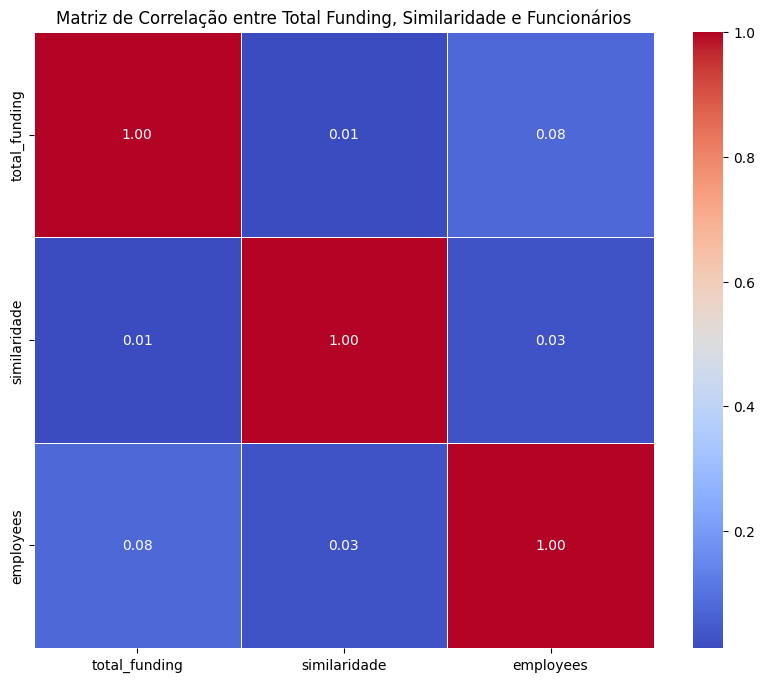

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame ordenado seja chamado df_sorted_funding

# Extraindo as colunas relevantes
columns_of_interest = ['total_funding', 'similaridade', 'employees']
df_selected_columns = df_sorted_funding[columns_of_interest]

# Calculando a matriz de correlação
correlation_matrix = df_selected_columns.corr()

# Criando um mapa de calor (heatmap) usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Total Funding, Similaridade e Funcionários')
plt.show()

In [48]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que você tenha o DataFrame df_sorted

# Configurações globais
app = dash.Dash(__name__)
app.title = 'Dashboard Empresarial'

# Layout do aplicativo
app.layout = html.Div([
    html.H1("Dashboard Empresarial", style={'text-align': 'center', 'background-color': 'dimgray', 'color': 'white', 'padding': '20px'}),
    
    # Gráfico de Distribuição de Funcionários
    html.Div([
        dcc.Graph(
            id='histogram-employees',
            figure={
                'data': [
                    {'x': df_sorted['employees'].dropna(), 'type': 'histogram', 'name': 'Funcionários'}
                ],
                'layout': {
                    'title': 'Distribuição de Funcionários por Empresa',
                    'xaxis': {'title': 'Número de Funcionários'},
                    'yaxis': {'title': 'Contagem de Empresas', 'type': 'log'},
                    'plot_bgcolor': 'lightgray',  # Adiciona o fundo cinza claro
                }
            }
        ),
    ], style={'width': '48%', 'display': 'inline-block'}),
    
    # Gráfico de Distribuição de Similaridade
    html.Div([
        dcc.Graph(
            id='histogram-similarity',
            figure={
                'data': [
                    {'x': df_sorted['similaridade'], 'type': 'histogram', 'name': 'Similaridade', 'marker': {'color': 'salmon'}}
                ],
                'layout': {
                    'title': 'Distribuição de Similaridade entre Empresas',
                    'xaxis': {'title': 'Similaridade'},
                    'yaxis': {'title': 'Contagem de Empresas'},
                    'plot_bgcolor': 'lightgray',  # Adiciona o fundo cinza claro
                }
            }
        ),
    ], style={'width': '48%', 'display': 'inline-block'}),
    
    # Gráfico de Dispersão entre Funcionários e Similaridade
    html.Div([
        dcc.Graph(
            id='scatter-employees-similarity',
            figure={
                'data': [
                    {'x': df_sorted['employees'], 'y': df_sorted['similaridade'], 'mode': 'markers', 'type': 'scatter', 'marker': {'opacity': 0.7}}
                ],
                'layout': {
                    'title': 'Relação entre Funcionários e Similaridade',
                    'xaxis': {'title': 'Número de Funcionários'},
                    'yaxis': {'title': 'Similaridade'},
                    'plot_bgcolor': 'lightgray',  # Adiciona o fundo cinza claro
                }
            }
        ),
    ], style={'width': '48%', 'display': 'inline-block'}),
    
    # Gráfico de Barras para as Top 10 Cidades
    html.Div([
        dcc.Graph(
            id='bar-top-cities',
            figure={
                'data': [
                    {'x': df_sorted['city'].value_counts().head(10).index, 'y': df_sorted['city'].value_counts().head(10).values, 'type': 'bar', 'marker': {'color': 'viridis'}}
                ],
                'layout': {
                    'title': 'Top 10 Cidades (Pólos de Desenvolvimento)',
                    'xaxis': {'title': 'Cidade'},
                    'yaxis': {'title': 'Número de Empresas'},
                    'plot_bgcolor': 'lightgray',  # Adiciona o fundo cinza claro
                }
            }
        ),
    ], style={'width': '48%', 'display': 'inline-block'}),
])

# Executando o aplicativo
if __name__ == '__main__':
    app.run_server(debug=True)


### ANÁLISE EXPLORATÓRIA DO DATAFRAME COM SIMILARIDADE PARA PROSPECÇÃO DE NOVAS EMPRESAS

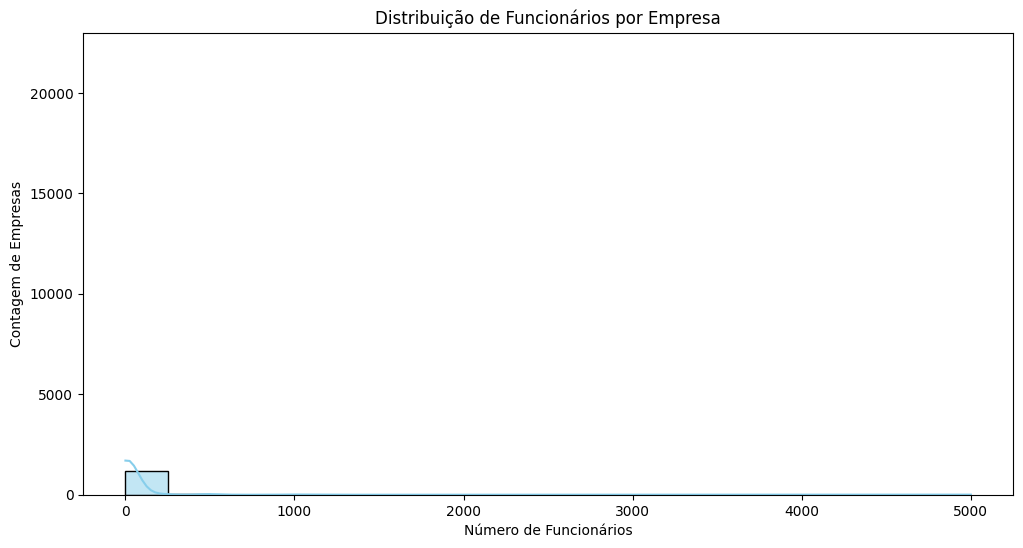

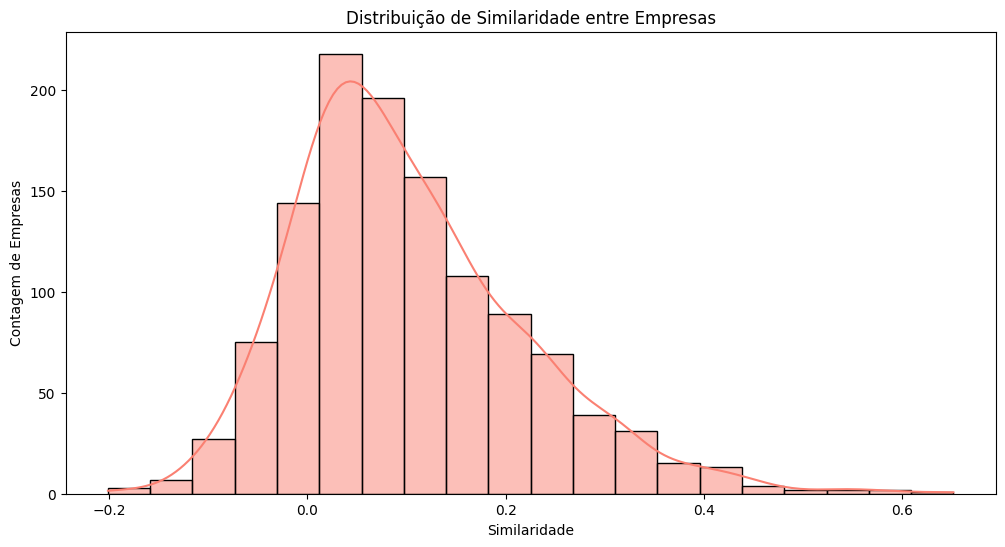

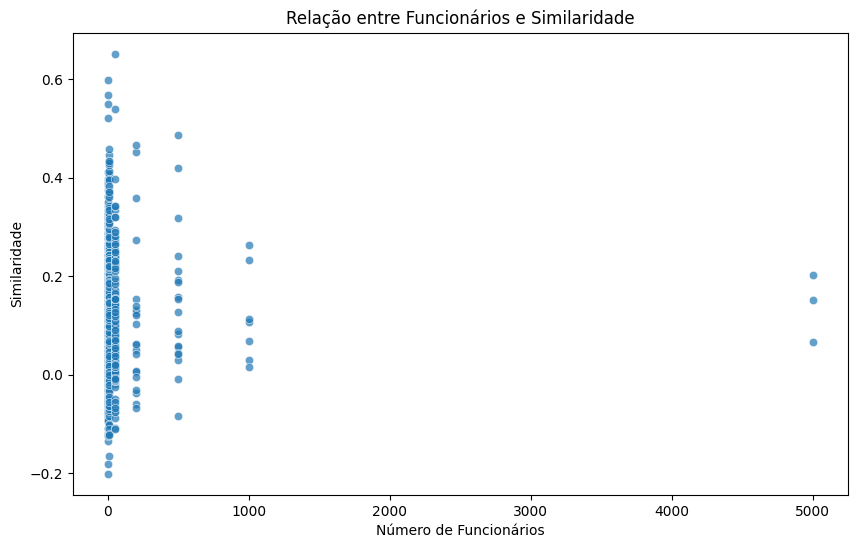

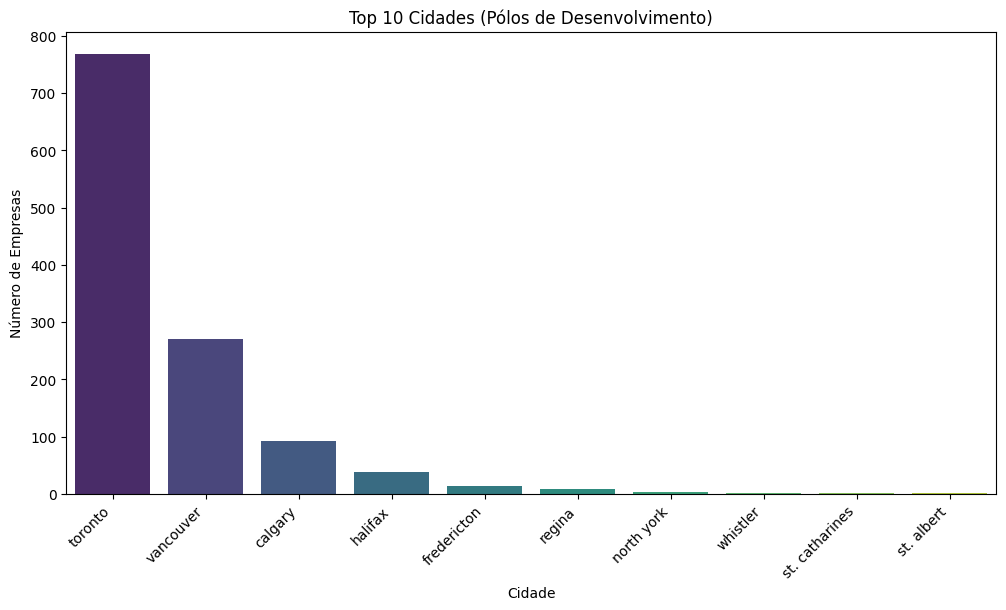

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertendo colunas para tipos numéricos
df_sorted['employees'] = pd.to_numeric(df_sorted['employees'], errors='coerce')

# Resumo estatístico para variáveis numéricas
summary_stats = df_sorted[['employees', 'similaridade']].describe()

# Correlação entre employees e similaridade
correlation_matrix = df_sorted[['employees', 'similaridade']].corr()

# Configurando a escala do eixo y para no máximo 20000
plt.figure(figsize=(12, 6))
sns.histplot(df_sorted['employees'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribuição de Funcionários por Empresa')
plt.xlabel('Número de Funcionários')
plt.ylabel('Contagem de Empresas')

# Configurando o limite superior do eixo y
plt.ylim(0, 23000)

plt.show()

# Distribuição de similaridade
plt.figure(figsize=(12, 6))
sns.histplot(df_sorted['similaridade'], bins=20, kde=True, color='salmon')
plt.title('Distribuição de Similaridade entre Empresas')
plt.xlabel('Similaridade')
plt.ylabel('Contagem de Empresas')
plt.show()

# Gráfico de dispersão entre employees e similaridade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='employees', y='similaridade', data=df_sorted, alpha=0.7)
plt.title('Relação entre Funcionários e Similaridade')
plt.xlabel('Número de Funcionários')
plt.ylabel('Similaridade')
plt.show()

# Visualização de principais cidades (pólos de desenvolvimento) usando um gráfico de barras
top_cities = df_sorted['city'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top 10 Cidades (Pólos de Desenvolvimento)')
plt.xlabel('Cidade')
plt.ylabel('Número de Empresas')
plt.xticks(rotation=45, ha='right')
plt.show()
